In [1]:
include("presentation.jl")

pygui(true)
ion()
fig = figure();

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.340165956245458, nactions=1),"α",2.340165956245458,"2.340165956245458",Interact.OptionDict(DataStructures.OrderedDict("1.5707963267948966"=>1.5708,"1.60285339468867"=>1.60285,"1.6349104625824435"=>1.63491,"1.6669675304762166"=>1.66697,"1.69902459836999"=>1.69902,"1.7310816662637636"=>1.73108,"1.7631387341575369"=>1.76314,"1.7951958020513104"=>1.7952,"1.8272528699450836"=>1.82725,"1.8593099378388571"=>1.85931…),Dict(2.27605=>"2.276051820457911",2.59662=>"2.5966224993956453",1.98754=>"1.9875382094139509",2.94925=>"2.9492502462271526",1.92342=>"1.9234240736264039",2.34017=>"2.340165956245458",2.62868=>"2.628679567289419",1.66697=>"1.6669675304762166",1.5708=>"1.5707963267948966",2.82102=>"2.8210219746520586"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.7448979591836735, nactions=1),"b",0.7448979591836735,"0.7448979591836735",Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.5102040816326531"=>0.510204,"0.5204081632653061"=>0.520408,"0.5306122448979592"=>0.530612,"0.5408163265306123"=>0.540816,"0.5510204081632653"=>0.55102,"0.5612244897959183"=>0.561224,"0.5714285714285714"=>0.571429,"0.5816326530612245"=>0.581633,"0.5918367346938775"=>0.591837…),Dict(0.622449=>"0.6224489795918368",0.663265=>"0.6632653061224489",0.602041=>"0.6020408163265306",0.795918=>"0.7959183673469388",0.908163=>"0.9081632653061225",0.846939=>"0.8469387755102041",0.591837=>"0.5918367346938775",0.693878=>"0.6938775510204082",0.959184=>"0.9591836734693877",0.55102=>"0.5510204081632653"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(0, nactions=1),"showing",0,"none",Interact.OptionDict(DataStructures.OrderedDict("none"=>0,"closest"=>1,"best"=>2),Dict(0=>"none",2=>"best",1=>"closest")),Any[],Any[],true,"horizontal")

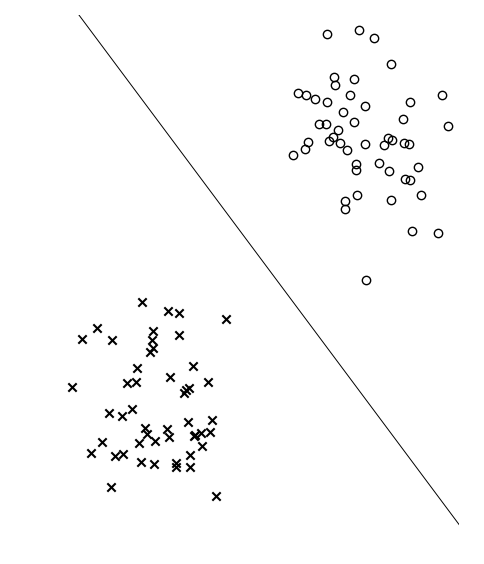

In [4]:
demo_1()

Interact.Slider{Int64}(Signal{Int64}(1, nactions=1),"",1,1:20,"horizontal",true,"d",true)

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(0, nactions=1),"showing",0,"none",Interact.OptionDict(DataStructures.OrderedDict("none"=>0,"space_boundary"=>1,"both"=>2,"intersection"=>3),Dict(0=>"none",2=>"both",3=>"intersection",1=>"space_boundary")),Any[],Any[],true,"horizontal")

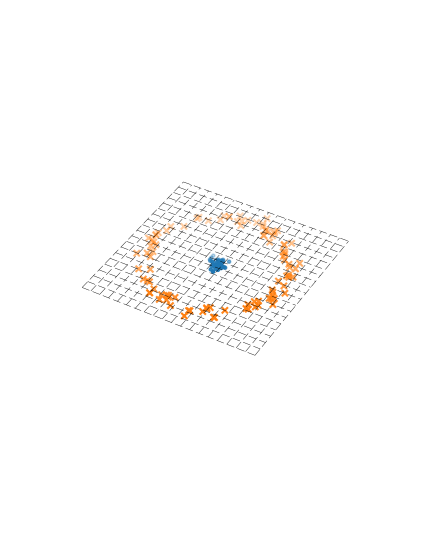

In [5]:
demo_2()